In [131]:
from main_copy import *
import pandas as pd
import matplotlib.pyplot as plt

Cały przepustowość 1

In [132]:
trip_ids = pd.read_csv('inputs/generated_trip.csv')
trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
n=1
A = TrainSimulation(trains,n, pd.read_csv('inputs/capacities1.csv'))

C:\Users\olkar\AppData\Local\Temp\ipykernel_25272\2333094405.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
C:\Users\olkar\AppData\Local\Temp\ipykernel_25272\2333094405.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
C:\Users\olkar\AppData\Local\Temp\ipykernel_25272\2333094405.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

In [133]:
A.simulation()

In [134]:
delays = np.array(A.delay)
delays.sum(axis=0)

array([   0,    0,    0,    0,    0,    0,    0,    1,    2,    3,    4,
          5,    7,    8,   11,   18,   24,   30,   35,   38,   44,   50,
         58,   66,   75,   83,   92,  104,  115,  127,  142,  154,  168,
        183,  198,  214,  226,  241,  257,  274,  291,  307,  322,  336,
        352,  369,  382,  396,  410,  423,  437,  450,  462,  476,  491,
        506,  522,  536,  550,  563,  577,  591,  605,  618,  630,  641,
        652,  663,  673,  686,  703,  718,  732,  749,  768,  787,  805,
        822,  839,  854,  867,  881,  895,  910,  925,  937,  949,  960,
        970,  980,  989,  998, 1007, 1018, 1028, 1038, 1049, 1058, 1068,
       1078, 1087, 1099, 1110, 1120, 1132, 1145, 1158, 1171, 1184, 1195,
       1207, 1219, 1232, 1244, 1258, 1269, 1280, 1291, 1302, 1315, 1331,
       1346, 1360, 1374, 1388, 1401, 1410, 1420, 1430, 1441, 1449, 1459,
       1471, 1484, 1496, 1509, 1524, 1539, 1555, 1571, 1589, 1608, 1628,
       1648, 1666, 1685, 1703, 1721, 1738, 1757, 17

Text(0.5, 1.0, 'Przypadek dla przepustowości 1')

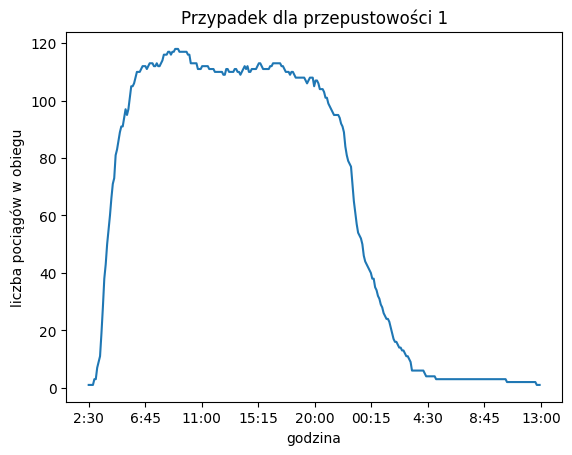

In [135]:
len_all_xd = []
for i in range(len(A.no_arrived)):
    len_all_xd.append(len(A.trains))

plt.plot(np.array(len_all_xd) - np.array(A.no_arrived) - np.array(A.no_stopped))
#plt.xticks(np.linspace(0, len(A.no_arrived)-30, 8), ['2:30', '5:30', '8:30', '11:30', '14:30', '17:30', '20:30', '23:30'])
plt.xticks(np.linspace(0, len(A.no_arrived), 9), ['2:30', '6:45', '11:00', '15:15', '20:00', '00:15', '4:30', '8:45', '13:00'])
plt.xlabel("godzina")
plt.ylabel("liczba pociągów w obiegu")
plt.title("Przypadek dla przepustowości 1")

Text(0.5, 1.0, 'Opóźnienie na trasie Warszawa - Bielsko-Biała')

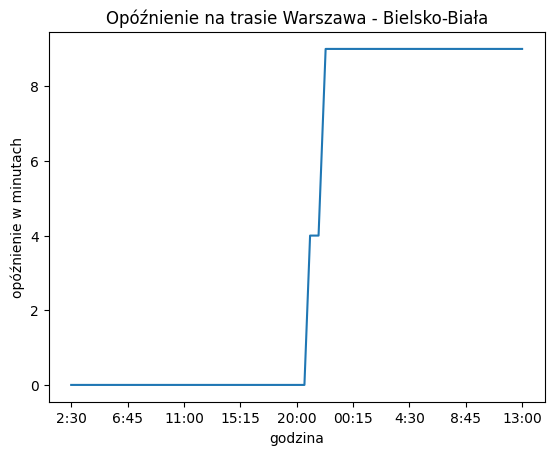

In [136]:
plt.plot(delays[16])
plt.xticks(np.linspace(0, len(A.no_arrived), 9), ['2:30', '6:45', '11:00', '15:15', '20:00', '00:15', '4:30', '8:45', '13:00'])
plt.xlabel("godzina")
plt.ylabel("opóźnienie w minutach")
plt.title("Opóźnienie na trasie Warszawa - Bielsko-Biała")

2530

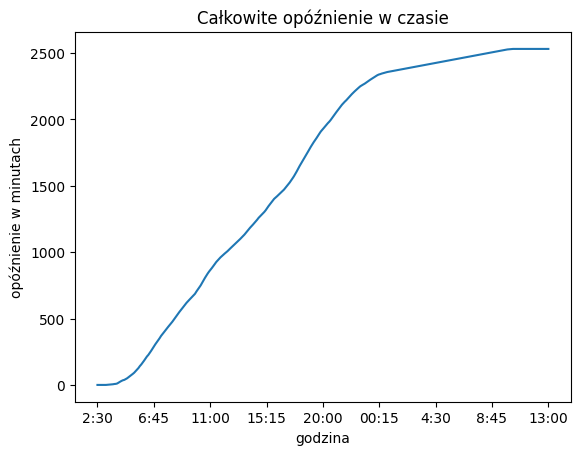

In [137]:
plt.plot(delays.sum(axis=0))
plt.xticks(np.linspace(0, len(A.no_arrived), 9), ['2:30', '6:45', '11:00', '15:15', '20:00', '00:15', '4:30', '8:45', '13:00'])
plt.xlabel("godzina")
plt.ylabel("opóźnienie w minutach")
plt.title("Całkowite opóźnienie w czasie")
delays.sum(axis=0)[-1]

In [138]:
sim_positions = A.positions

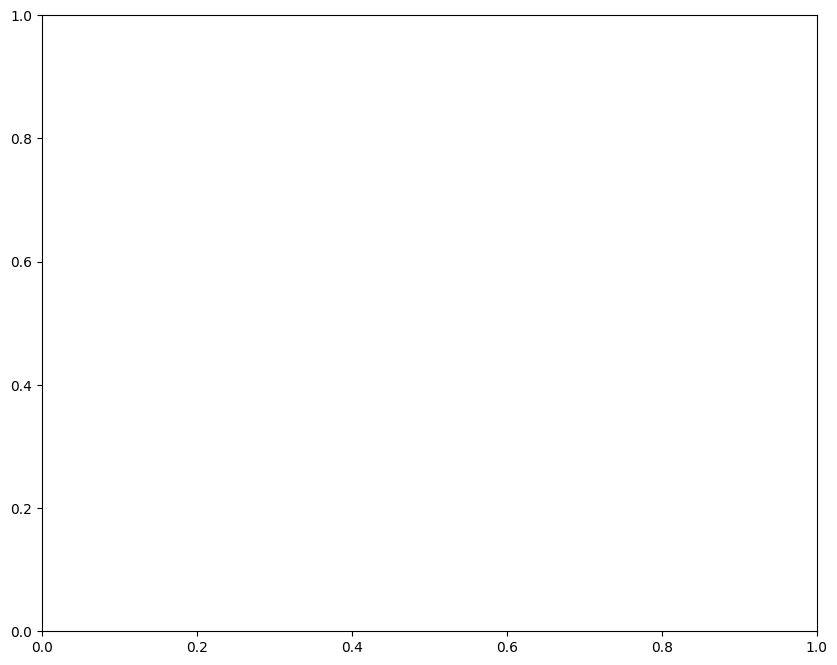

In [139]:
B = create_anim(A,pd.read_csv('inputs/stops_io.txt'),pd.read_csv('inputs/id_capacities1.csv'))

In [140]:
save_anim(B.animate())

MovieWriter imagemagick unavailable; using Pillow instead.


Policzenie maksymalnych przepustowości

In [141]:
from main_count import *

In [142]:
A = TrainSimulationCount(trains,n, pd.read_csv('inputs/capacities.csv'))

In [143]:
A.simulation()

In [144]:
capacities = A.max_capacity_counter

edges = list(capacities.keys())
vals = list(capacities.values())
cap = DataFrame({'Edge': edges, 'Capacity': vals})
cap.to_csv('inputs/capacities_estimated.csv')

In [145]:
edges = []
for i in range(6):
    edges.append([k for k, v in capacities.items() if v == i])

In [146]:
for i in range(6):
    print(f'Number of edges with capacity {i}: {len(edges[i])}')

Number of edges with capacity 0: 168
Number of edges with capacity 1: 353
Number of edges with capacity 2: 112
Number of edges with capacity 3: 8
Number of edges with capacity 4: 2
Number of edges with capacity 5: 0


In [147]:
edges[5]

[]

In [148]:
edges[4]

[('Warszawa Centralna_i', 'Warszawa Centralna_o'),
 ('Poznań Główny_i', 'Poznań Główny_o')]

In [149]:
cnt = A.count_edge

m = sorted(cnt, key=cnt.get, reverse=True)
for i in range(100):
    print(m[i], cnt[m[i]])

('Poznań Główny_i', 'Poznań Główny_o') 200
('Warszawa Centralna_i', 'Warszawa Centralna_o') 185
('Świebodzin', 'Rzepin') 165
('Iława Główna', 'Malbork') 157
('Poznań Główny', 'Zbąszynek') 154
('Tczew', 'Gdańsk Główny') 148
('Koluszki', 'Skierniewice') 148
('Warszawa Zachodnia', 'Kraków Główny') 134
('Kraków Główny', 'Tarnów') 130
('Zielona Góra Główna', 'Rzepin') 128
('Kraków Główny_i', 'Kraków Główny_o') 126
('Kutno', 'Włocławek') 124
('Kielce', 'Suchedniów') 122
('Kraków Główny', 'Miechów') 115
('Bydgoszcz Główna', 'Laskowice Pomorskie') 115
('Kutno', 'Łowicz Główny') 114
('Radomsko', 'Częstochowa') 112
('Warszawa Zachodnia', 'Sochaczew') 111
('Kraków Płaszów', 'Bochnia') 110
('Ciechanów', 'Nowy Dwór Mazowiecki') 109
('Poznań Główny', 'Gniezno') 106
('Wrocław Główny_i', 'Wrocław Główny_o') 106
('Sopot', 'Gdynia Główna') 105
('Warszawa Wschodnia', 'Warszawa Centralna') 105
('Białogard', 'Szczecinek') 104
('Radomsko', 'Piotrków Trybunalski') 100
('Słupsk', 'Lębork') 99
('Warszawa Gdańs

Text(0.5, 1.0, 'Przypadek dla nieograniczonej (maksymalnej) przepustowości')

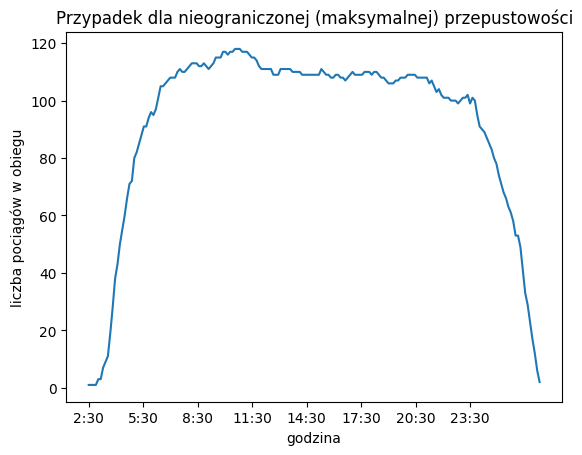

In [150]:
len_all_xd = []
for i in range(len(A.no_arrived)):
    len_all_xd.append(len(A.trains))

plt.plot(np.array(len_all_xd) - np.array(A.no_arrived) - np.array(A.no_stopped))
plt.xticks(np.linspace(0, len(A.no_arrived)-30, 8), ['2:30', '5:30', '8:30', '11:30', '14:30', '17:30', '20:30', '23:30'])
#plt.xticks(np.linspace(0, len(A.no_arrived), 9), ['2:30', '6:45', '11:00', '15:15', '20:00', '00:15', '4:30', '8:45', '13:00'])
plt.xlabel("godzina")
plt.ylabel("liczba pociągów w obiegu")
plt.title("Przypadek dla nieograniczonej (maksymalnej) przepustowości")

Gif wszystkie z maxymalną przepustowością

In [151]:
n=1
A = TrainSimulation(trains,n, pd.read_csv('inputs/capacities_estimated.csv'))

In [152]:
A.simulation()

In [153]:
delays = np.array(A.delay)
delays.sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [154]:
sim_positions = A.positions

In [155]:
#B = create_anim(A,pd.read_csv('inputs/stops_io.txt'),pd.read_csv('inputs/id_capacities_estimated.csv'))

In [156]:
#save_anim(B.animate())

przepustowość warszawa centralna. warszawa centralna = 1

In [157]:
A = TrainSimulation(trains,n, pd.read_csv('inputs/capacties_estimated_changed.csv'))

In [158]:
A.simulation()
sim_positions = A.positions

In [159]:
delays = np.array(A.delay)
delays.sum(axis=0)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   3,   4,
         4,   4,   5,   6,   7,   8,  11,  14,  17,  21,  24,  28,  32,
        36,  40,  43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,
        76,  79,  82,  85,  88,  91,  94,  97, 100, 103, 106, 108, 110,
       112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       125, 125, 125, 125, 125, 125, 126, 127, 130, 133, 135, 137, 139,
       141, 144, 147, 152, 156, 160, 164, 168, 172, 176, 180, 184, 187,
       190, 193, 196, 200, 204, 207, 210, 213, 216, 219, 222, 225, 228,
       231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 263, 265,
       267, 269, 272, 275, 278, 281, 284, 287, 290, 293, 296, 299, 302,
       306, 311, 315, 319, 323, 327, 332, 337, 341, 345, 349, 353, 357,
       361, 365, 369, 373, 377, 381, 385, 388, 391, 394, 397, 400, 403,
       406, 409, 412, 416, 420, 424, 428, 432, 436, 440, 444, 44

484

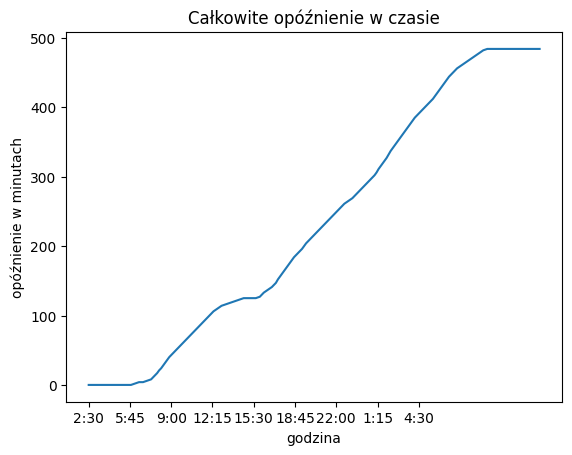

In [160]:
plt.plot(delays.sum(axis=0))
plt.xticks(np.linspace(0, len(A.no_arrived)-60, 9), ['2:30', '5:45', '9:00', '12:15', '15:30', '18:45', '22:00', '1:15', '4:30'])
plt.xlabel("godzina")
plt.ylabel("opóźnienie w minutach")
plt.title("Całkowite opóźnienie w czasie")
delays.sum(axis=0)[-1]

In [161]:
#B = create_anim(A,pd.concat([pd.read_csv('inputs/stops_io.txt'), pd.read_csv('inputs/stops.txt')]),pd.read_csv('inputs/id_capacities.csv'))

In [162]:
#save_anim(B.animate())

Opóźnienie jakiegoś ważnego pociągu

In [163]:
capacities = A.capacities
filtered = {}

for k, v in cnt.items():
    if k != ('Warszawa Centralna_i', 'Warszawa Centralna_o'):
        if k in capacities:
            if capacities[k] == 1:
                filtered[k] = v
        else:
            if capacities[(k[1], k[0])] == 1:
                filtered[(k[1], k[0])] = v

m = max(filtered, key=filtered.get)
print(m, filtered[m])

('Warszawa Zachodnia', 'Kraków Główny') 134


In [164]:
trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
A = TrainSimulation(trains,n, pd.read_csv('inputs/capacities_estimated.csv'))

C:\Users\olkar\AppData\Local\Temp\ipykernel_25272\3246003752.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
C:\Users\olkar\AppData\Local\Temp\ipykernel_25272\3246003752.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trains = [pd.read_csv(f'inputs/routes/{trip_ids.iloc[i][0]}.csv') for i in range(len(trip_ids))]
C:\Users\olkar\AppData\Local\Temp\ipykernel_25272\3246003752.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

In [165]:
A.simulation()
sim_positions = A.positions

In [166]:
delays = np.array(A.delay)
delays.sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

0

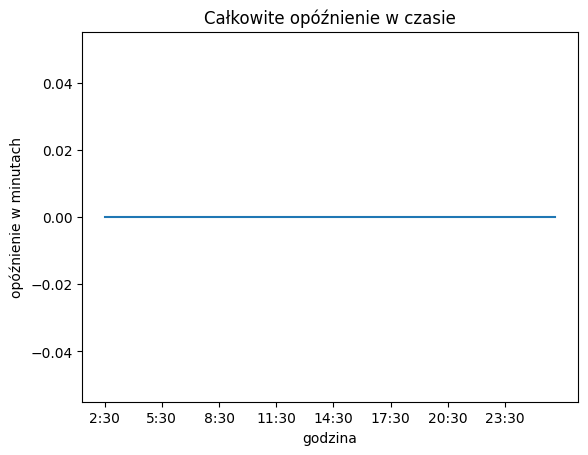

In [167]:
plt.plot(delays.sum(axis=0))
plt.xticks(np.linspace(0, len(A.no_arrived)-30, 8), ['2:30', '5:30', '8:30', '11:30', '14:30', '17:30', '20:30', '23:30'])
plt.xlabel("godzina")
plt.ylabel("opóźnienie w minutach")
plt.title("Całkowite opóźnienie w czasie")
delays.sum(axis=0)[-1]

In [168]:
#B = create_anim(A,pd.read_csv('inputs/stops_io.txt'),pd.read_csv('inputs/id_capacities_estimated.csv'))

In [169]:
#save_anim(B.animate())